# Binary stars statistics

## Useful distributions

In [5]:
from functools import partial
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np
from pydantic.dataclasses import dataclass
from scipy import interpolate
from scipy.stats import rv_continuous

In [6]:
@dataclass
class BaseDistribution:

    dist_function: Callable
    dist_parameters: dict = None
    
    def __post_init_post_parse__(self):
        if not self.dist_parameters:
            self.dist_parameters = {}
        self._pdf = partial(self.dist_function,**self.dist_parameters)

    def compute_pdf_norm(self, x:np.array):
        self.norm_factor = (x.max() - x.min())/len(x)
        if not hasattr(self, "norm"):
            self.norm = sum(self._pdf(value)*self.norm_factor for value in x)

    def cdf(self, x:np.array):
        self.compute_pdf_norm(x)
        pdf_values = self._pdf(x)
        cumulative_sum = np.cumsum(pdf_values * self.norm_factor)
        normalized_cumulative_sum = cumulative_sum / cumulative_sum[-1]
        return normalized_cumulative_sum
        
    def pdf(self, x, isNormalized: bool = False):
        self.compute_pdf_norm(x)
        return self._pdf(x)/self.norm

    def random_sample(self,x_min:float, x_max:float, size: int):
        x = np.linspace(x_min, x_max, size)
        cdf = self.cdf(x)

        cdf_inv = interpolate.interp1d(cdf,x)

        x_new = np.random.uniform(0.001,0.999,size=size)
        return cdf_inv(x_new)

In [7]:
def uniform(x):
    return 1.0 if isinstance(x,float) else np.ones_like(x)

In [8]:
uniform_dist = BaseDistribution(
    dist_function=uniform,
)

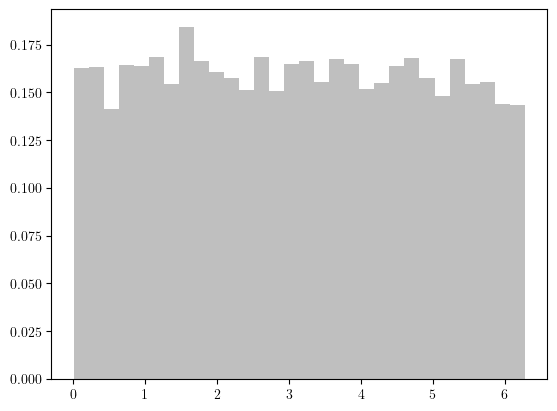

In [9]:
_=plt.hist(uniform_dist.random_sample(0,2*np.pi,10_000), bins=30, density=True, alpha=0.5, color="gray")

In [10]:
def thermal(x):
    return x

In [8]:
thermal_dist = BaseDistribution(
    dist_function=thermal
)

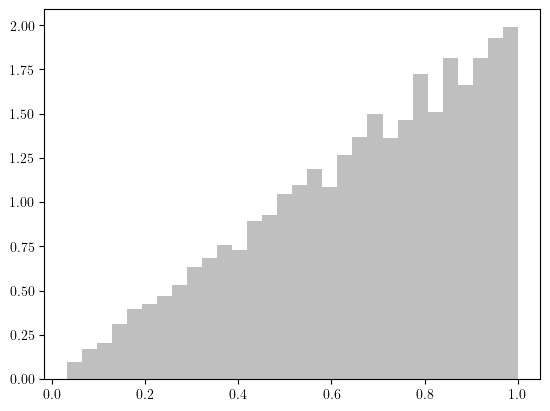

In [9]:
_=plt.hist(thermal_dist.random_sample(0,1,10_000), bins=30, density=True, alpha=0.5, color="gray")

In [10]:
def power_law(x):
    return 1.0/x

In [11]:
power_law_dist = BaseDistribution(
    dist_function=power_law
)

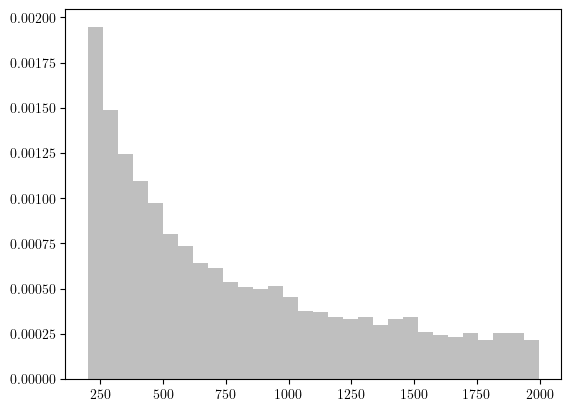

In [12]:
_=plt.hist(power_law_dist.random_sample(200,2000,10_000), bins=30, density=True, alpha=0.5, color="gray")